# LIBRERIAS NECESARIAS. CONFIGURACION.

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV

# Varios
# ==============================================================================
import sys
import os
import multiprocessing


In [2]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [3]:
DATA_FOLDER = '../data'
OUTPUT_FOLDER = '../output'
UTILS_FOLDER = '../utils'
DATAFILE = 'Life Expectancy Data.csv'

# hay que partir del raíz por llamadas internas dentro de los módulos de interés
CUSTOM_FOLDER = '../'


sys.path.append(os.path.abspath(UTILS_FOLDER))
sys.path.append(os.path.abspath(CUSTOM_FOLDER))


In [4]:
%load_ext autoreload
%autoreload 2

In [1]:
print('esto es una prueba, IDE pycharm')

esto es una prueba, IDE pycharm


# CARGA DATOS

In [5]:
df_le = pd.read_csv(os.path.join(DATA_FOLDER,DATAFILE), sep=',')

df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Los nombres de las columnas contienen espacios:

In [6]:
df_le.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
nom_columnas = [col.strip() for col in df_le.columns.values]
nom_columnas = [col.replace(' ','_') for col in nom_columnas]
nom_columnas = [col.replace('-','_') for col in nom_columnas]
nom_columnas = [col.replace('/','_') for col in nom_columnas]

df_le.columns = nom_columnas

df_le.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness__1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

## Reordenamos las columas, juntando relacionadas y al final el target

In [8]:
df_le = df_le[['Country', 'Year', 'Status', 'Population','Income_composition_of_resources', 'percentage_expenditure',
                   'Total_expenditure', 'GDP', 'Hepatitis_B', 'Polio', 'Diphtheria', 'Measles', 'HIV_AIDS', 'BMI', 'Alcohol',
                   'thinness_5_9_years', 'thinness__1_19_years', 'Schooling', 
                   'under_five_deaths','infant_deaths','Adult_Mortality', 'Life_expectancy']]

df_le.columns


Index(['Country', 'Year', 'Status', 'Population',
       'Income_composition_of_resources', 'percentage_expenditure',
       'Total_expenditure', 'GDP', 'Hepatitis_B', 'Polio', 'Diphtheria',
       'Measles', 'HIV_AIDS', 'BMI', 'Alcohol', 'thinness_5_9_years',
       'thinness__1_19_years', 'Schooling', 'under_five_deaths',
       'infant_deaths', 'Adult_Mortality', 'Life_expectancy'],
      dtype='object')

In [9]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Population                       2286 non-null   float64
 4   Income_composition_of_resources  2771 non-null   float64
 5   percentage_expenditure           2938 non-null   float64
 6   Total_expenditure                2712 non-null   float64
 7   GDP                              2490 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Polio                            2919 non-null   float64
 10  Diphtheria                       2919 non-null   float64
 11  Measles                          2938 non-null   int64  
 12  HIV_AIDS            

## Renombramos las columnas de gasto para dejarlas más claras y evitar confusiones:

In [10]:
df_le.rename(columns={'percentage_expenditure': 'pct_exp_GDP', 'Total_expenditure': 'pct_total_exp',
                     'Income_composition_of_resources': 'Income_index'}, inplace=True)


df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2938 non-null   object 
 1   Year                  2938 non-null   int64  
 2   Status                2938 non-null   object 
 3   Population            2286 non-null   float64
 4   Income_index          2771 non-null   float64
 5   pct_exp_GDP           2938 non-null   float64
 6   pct_total_exp         2712 non-null   float64
 7   GDP                   2490 non-null   float64
 8   Hepatitis_B           2385 non-null   float64
 9   Polio                 2919 non-null   float64
 10  Diphtheria            2919 non-null   float64
 11  Measles               2938 non-null   int64  
 12  HIV_AIDS              2938 non-null   float64
 13  BMI                   2904 non-null   float64
 14  Alcohol               2744 non-null   float64
 15  thinness_5_9_years   

## Decidimos poner como indices 'Country' y 'Year':

In [11]:
df_le.set_index(['Country','Year'], inplace=True)

df_le.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2938 entries, ('Afghanistan', 2015) to ('Zimbabwe', 2000)
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Status                2938 non-null   object 
 1   Population            2286 non-null   float64
 2   Income_index          2771 non-null   float64
 3   pct_exp_GDP           2938 non-null   float64
 4   pct_total_exp         2712 non-null   float64
 5   GDP                   2490 non-null   float64
 6   Hepatitis_B           2385 non-null   float64
 7   Polio                 2919 non-null   float64
 8   Diphtheria            2919 non-null   float64
 9   Measles               2938 non-null   int64  
 10  HIV_AIDS              2938 non-null   float64
 11  BMI                   2904 non-null   float64
 12  Alcohol               2744 non-null   float64
 13  thinness_5_9_years    2904 non-null   float64
 14  thinness__1_19_years  2904 non-null   

In [12]:
df_le.index

MultiIndex([('Afghanistan', 2015),
            ('Afghanistan', 2014),
            ('Afghanistan', 2013),
            ('Afghanistan', 2012),
            ('Afghanistan', 2011),
            ('Afghanistan', 2010),
            ('Afghanistan', 2009),
            ('Afghanistan', 2008),
            ('Afghanistan', 2007),
            ('Afghanistan', 2006),
            ...
            (   'Zimbabwe', 2009),
            (   'Zimbabwe', 2008),
            (   'Zimbabwe', 2007),
            (   'Zimbabwe', 2006),
            (   'Zimbabwe', 2005),
            (   'Zimbabwe', 2004),
            (   'Zimbabwe', 2003),
            (   'Zimbabwe', 2002),
            (   'Zimbabwe', 2001),
            (   'Zimbabwe', 2000)],
           names=['Country', 'Year'], length=2938)

In [13]:
df_le.sample(n=8)

,,Status,Population,Income_index,pct_exp_GDP,pct_total_exp,GDP,Hepatitis_B,Polio,Diphtheria,Measles,HIV_AIDS,BMI,Alcohol,thinness_5_9_years,thinness__1_19_years,Schooling,under_five_deaths,infant_deaths,Adult_Mortality,Life_expectancy
Country,Year,,,,,,,,,,,,,,,,,,,,
Cuba,2002,Developing,NaN,0.692,334.767211,6.50,2994.339988,98.0,98.0,99.0,0,0.1,51.3,4.10,3.3,3.5,12.5,1,1,19.0,77.7
Cabo Verde,2006,Developing,48795.0,0.596,26.451332,5.11,234.289920,95.0,97.0,96.0,0,0.6,24.9,4.25,8.3,8.3,11.9,0,0,129.0,72.1
Comoros,2005,Developing,611627.0,0.434,69.967544,4.32,621.933720,68.0,67.0,68.0,912,0.1,19.2,0.24,7.4,7.5,9.7,2,2,266.0,60.0
Slovakia,2007,Developed,NaN,0.802,0.000000,7.76,NaN,99.0,99.0,99.0,0,0.1,54.2,10.58,1.4,1.3,14.5,0,0,14.0,74.4
Egypt,2011,Developing,NaN,0.671,0.000000,5.40,NaN,96.0,96.0,96.0,26,0.1,57.8,0.22,2.9,2.9,12.4,64,55,168.0,74.0
Uzbekistan,2007,Developing,26868.0,0.631,9.290984,5.81,83.476942,99.0,98.0,96.0,863,0.3,38.7,2.15,3.1,3.1,11.8,26,22,184.0,67.8
Qatar,2013,Developing,NaN,0.843,515.073479,2.15,8834.879580,97.0,99.0,97.0,73,0.1,67.7,1.20,4.7,5.1,13.4,0,0,7.0,77.9
Republic of Moldova,2010,Developing,NaN,NaN,0.000000,12.80,NaN,98.0,97.0,9.0,0,0.1,5.4,8.25,3.0,2.8,NaN,1,1,219.0,68.8


In [14]:
df_le.loc[('Bulgaria',2014),'Status']

'Developed'

## FINAL CORRECIÓN Y ORDEN NOMBRES COLUMNAS

In [15]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2938 entries, ('Afghanistan', 2015) to ('Zimbabwe', 2000)
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Status                2938 non-null   object 
 1   Population            2286 non-null   float64
 2   Income_index          2771 non-null   float64
 3   pct_exp_GDP           2938 non-null   float64
 4   pct_total_exp         2712 non-null   float64
 5   GDP                   2490 non-null   float64
 6   Hepatitis_B           2385 non-null   float64
 7   Polio                 2919 non-null   float64
 8   Diphtheria            2919 non-null   float64
 9   Measles               2938 non-null   int64  
 10  HIV_AIDS              2938 non-null   float64
 11  BMI                   2904 non-null   float64
 12  Alcohol               2744 non-null   float64
 13  thinness_5_9_years    2904 non-null   float64
 14  thinness__1_19_years  2904 non-null   

In [16]:
df_le.describe()

,Population,Income_index,pct_exp_GDP,pct_total_exp,GDP,Hepatitis_B,Polio,Diphtheria,Measles,HIV_AIDS,BMI,Alcohol,thinness_5_9_years,thinness__1_19_years,Schooling,under_five_deaths,infant_deaths,Adult_Mortality,Life_expectancy
count,2.286000e+03,2771.000000,2938.000000,2712.00000,2490.000000,2385.000000,2919.000000,2919.000000,2938.000000,2938.000000,2904.000000,2744.000000,2904.000000,2904.000000,2775.000000,2938.000000,2938.000000,2928.000000,2928.000000
mean,1.275338e+07,0.627551,738.251295,5.93819,7483.158469,80.940461,82.550188,82.324084,2419.592240,1.742103,38.321247,4.602861,4.870317,4.839704,11.992793,42.035739,30.303948,164.796448,69.224932
std,6.101210e+07,0.210904,1987.914858,2.49832,14270.169342,25.070016,23.428046,23.716912,11467.272489,5.077785,20.044034,4.052413,4.508882,4.420195,3.358920,160.445548,117.926501,124.292079,9.523867
min,3.400000e+01,0.000000,0.000000,0.37000,1.681350,1.000000,3.000000,2.000000,0.000000,0.100000,1.000000,0.010000,0.100000,0.100000,0.000000,0.000000,0.000000,1.000000,36.300000
25%,1.957932e+05,0.493000,4.685343,4.26000,463.935626,77.000000,78.000000,78.000000,0.000000,0.100000,19.300000,0.877500,1.500000,1.600000,10.100000,0.000000,0.000000,74.000000,63.100000
50%,1.386542e+06,0.677000,64.912906,5.75500,1766.947595,92.000000,93.000000,93.000000,17.000000,0.100000,43.500000,3.755000,3.300000,3.300000,12.300000,4.000000,3.000000,144.000000,72.100000
75%,7.420359e+06,0.779000,441.534144,7.49250,5910.806335,97.000000,97.000000,97.000000,360.250000,0.800000,56.200000,7.702500,7.200000,7.200000,14.300000,28.000000,22.000000,228.000000,75.700000
max,1.293859e+09,0.948000,19479.911610,17.60000,119172.741800,99.000000,99.000000,99.000000,212183.000000,50.600000,87.300000,17.870000,28.600000,27.700000,20.700000,2500.000000,1800.000000,723.000000,89.000000


In [17]:
df_le.describe(include='object')

,Status
count,2938
unique,2
top,Developing
freq,2426


## Poblacion, ¿valores anómalos?

In [18]:
df_le.Population.describe()

count    2.286000e+03
mean     1.275338e+07
std      6.101210e+07
min      3.400000e+01
25%      1.957932e+05
50%      1.386542e+06
75%      7.420359e+06
max      1.293859e+09
Name: Population, dtype: float64

In [19]:
df_le[df_le.Population==df_le.Population.min()]

,,Status,Population,Income_index,pct_exp_GDP,pct_total_exp,GDP,Hepatitis_B,Polio,Diphtheria,Measles,HIV_AIDS,BMI,Alcohol,thinness_5_9_years,thinness__1_19_years,Schooling,under_five_deaths,infant_deaths,Adult_Mortality,Life_expectancy
Country,Year,,,,,,,,,,,,,,,,,,,,
Maldives,2003,Developing,34.0,0.601,491.497891,5.9,3432.247841,98.0,98.0,98.0,75,0.1,16.7,1.75,14.7,14.6,11.8,0,0,112.0,72.7


In [20]:
df_le.sort_values(by='Population').head(10)

Status  Population  Income_index  pct_exp_GDP  \
Country  Year                                                      
Maldives 2003  Developing        34.0         0.601   491.497891   
         2009  Developing        36.0         0.651   100.503021   
         2014  Developing        41.0         0.693  2051.748615   
Georgia  2008  Developing        43.0         0.735   151.762567   
Hungary  2010   Developed       123.0         0.817    19.220240   
Tonga    2008  Developing       135.0         0.698   569.625504   
         2004  Developing       146.0         0.693   423.295351   
Maldives 2000  Developing       286.0         0.577   300.162103   
         2001  Developing       292.0         0.587    41.306888   
Palau    2013  Developing       292.0         0.779   344.690631   

               pct_total_exp          GDP  Hepatitis_B  Polio  Diphtheria  \
Country  Year                                                               
Maldives 2003           5.90  3432.247841         98.0   98.0        98.0   
         2009           9.22   597.165900         98.0   98.0        98.0   
         2014          13.73  7716.241500         99.0   99.0        99.0   
Georgia  2008           8.99  3174.949100         89.0    9.0        92.0   
Hungary  2010           7.85  1325.533790          NaN   99.0        99.0   
Tonga    2008           5.13  3392.647430         84.0   88.0        86.0   
         2004           4.87  2284.378580          9.0   91.0         9.0   
Maldives 2000           8.00  2182.997110         96.0   98.0        98.0   
         2001           5.84   298.675980         98.0   97.0        98.0   
Palau    2013           9.27  1932.122370         99.0   99.0        99.0   

               Measles  HIV_AIDS   BMI  Alcohol  thinness_5_9_years  \
Country  Year                                                         
Maldives 2003       75       0.1  16.7     1.75                14.7   
         2009        6       0.1  21.2     1.59                14.2   
         2014        0       0.1  26.2     0.01                13.7   
Georgia  2008       56       0.1   5.5     7.17                 2.8   
Hungary  2010        0       0.1  61.7    10.78                 1.8   
Tonga    2008        0       0.1  71.5     1.10                 0.1   
         2004        0       0.1  68.6     1.80                 0.1   
Maldives 2000       20       0.1  15.2     1.83                14.8   
         2001        0       0.1  15.6     1.98                14.8   
Palau    2013        0       0.1  83.3      NaN                 0.1   

               thinness__1_19_years  Schooling  under_five_deaths  \
Country  Year                                                       
Maldives 2003                  14.6       11.8                  0   
         2009                  14.1       11.8                  0   
         2014                  13.6       12.7                  0   
Georgia  2008                   2.6       13.1                  1   
Hungary  2010                   1.8       15.3                  1   
Tonga    2008                   0.1       14.5                  0   
         2004                   0.1       14.6                  0   
Maldives 2000                  14.8       11.3                  0   
         2001                  14.7       11.8                  0   
Palau    2013                   0.1       14.2                  0   

               infant_deaths  Adult_Mortality  Life_expectancy  
Country  Year                                                   
Maldives 2003              0            112.0             72.7  
         2009              0             75.0             76.3  
         2014              0             62.0             78.2  
Georgia  2008              1            128.0             73.9  
Hungary  2010              0            156.0             74.5  
Tonga    2008              0            145.0             72.6  
         2004              0            151.0             72.2  
Maldives 2

In [21]:
df_le.loc[('Hungary')].sort_values(by='Year')

,Status,Population,Income_index,pct_exp_GDP,pct_total_exp,GDP,Hepatitis_B,Polio,Diphtheria,Measles,HIV_AIDS,BMI,Alcohol,thinness_5_9_years,thinness__1_19_years,Schooling,under_five_deaths,infant_deaths,Adult_Mortality,Life_expectancy
Year,,,,,,,,,,,,,,,,,,,,
2000,Developed,121971.0,0.761,75.362514,7.60,4623.46712,NaN,99.0,99.0,1,0.1,56.1,12.22,2.3,2.3,13.9,1,1,193.0,71.7
2001,Developed,1187576.0,0.769,7.601092,7.11,527.85364,NaN,99.0,99.0,20,0.1,56.6,13.18,2.2,2.2,14.2,1,1,185.0,72.3
2002,Developed,115868.0,0.775,8.986198,7.47,665.64430,NaN,98.0,99.0,0,0.1,57.1,13.29,2.2,2.2,14.6,1,1,184.0,72.5
2003,Developed,1129552.0,0.784,1030.220271,8.42,8396.25323,NaN,99.0,99.0,0,0.1,57.6,13.24,2.1,2.1,14.9,1,1,184.0,72.5
2004,Developed,117146.0,0.793,146.860802,8.80,1259.52660,NaN,99.0,99.0,0,0.1,58.2,13.28,2.1,2.1,15.3,1,1,18.0,72.9
2005,Developed,18765.0,0.795,1317.083480,8.28,11161.72441,NaN,99.0,99.0,2,0.1,58.8,12.94,2.0,2.0,15.0,1,1,182.0,72.9
2006,Developed,17137.0,0.802,1299.459306,8.10,11398.76584,NaN,99.0,99.0,1,0.1,59.3,13.16,2.0,2.0,15.2,1,1,177.0,73.4
2007,Developed,15578.0,0.809,163.343328,7.51,13842.65490,NaN,99.0,99.0,0,0.1,59.9,12.55,1.9,1.9,15.3,1,1,176.0,73.5
2008,Developed,138188.0,0.812,181.763408,7.33,15669.25929,NaN,99.0,99.0,0,0.1,6.5,11.64,1.9,1.9,15.3,1,1,165.0,74.1


In [22]:
def intervalo(columna):
    return columna.max() - columna.min()

In [23]:
df_le.groupby(by='Country')['Population'] \
.aggregate([('Diferencia',intervalo), ('Maximo','max'), ('Minimo','min')]) \
.sort_values(by='Diferencia',ascending=False).head(10)

,Diferencia,Maximo,Minimo
Country,,,
India,1.292464e+09,1.293859e+09,1395398.0
Indonesia,2.560165e+08,2.581621e+08,2145652.0
Brazil,1.984297e+08,1.986867e+08,256983.0
Pakistan,1.855305e+08,1.855463e+08,15783.0
Nigeria,1.799582e+08,1.811817e+08,1223529.0
Bangladesh,1.574321e+08,1.575713e+08,139191.0
Russian Federation,1.451680e+08,1.465966e+08,1428588.0
Mexico,1.224161e+08,1.225360e+08,119917.0
Ethiopia,9.735862e+07,9.736677e+07,8149.0


In [24]:
df_le.index

MultiIndex([('Afghanistan', 2015),
            ('Afghanistan', 2014),
            ('Afghanistan', 2013),
            ('Afghanistan', 2012),
            ('Afghanistan', 2011),
            ('Afghanistan', 2010),
            ('Afghanistan', 2009),
            ('Afghanistan', 2008),
            ('Afghanistan', 2007),
            ('Afghanistan', 2006),
            ...
            (   'Zimbabwe', 2009),
            (   'Zimbabwe', 2008),
            (   'Zimbabwe', 2007),
            (   'Zimbabwe', 2006),
            (   'Zimbabwe', 2005),
            (   'Zimbabwe', 2004),
            (   'Zimbabwe', 2003),
            (   'Zimbabwe', 2002),
            (   'Zimbabwe', 2001),
            (   'Zimbabwe', 2000)],
           names=['Country', 'Year'], length=2938)

Datos erroneos de población, en GRAN NÚMERO. MMnimos demasiado pequeños y diferencias muy grandes para 15 años:

**DECIDIMOS ELIMINAR POBLACION**

## PCT_EXP_GDP, valores no acordes con definición (pctje)

In [25]:
df_le.describe()

,Population,Income_index,pct_exp_GDP,pct_total_exp,GDP,Hepatitis_B,Polio,Diphtheria,Measles,HIV_AIDS,BMI,Alcohol,thinness_5_9_years,thinness__1_19_years,Schooling,under_five_deaths,infant_deaths,Adult_Mortality,Life_expectancy
count,2.286000e+03,2771.000000,2938.000000,2712.00000,2490.000000,2385.000000,2919.000000,2919.000000,2938.000000,2938.000000,2904.000000,2744.000000,2904.000000,2904.000000,2775.000000,2938.000000,2938.000000,2928.000000,2928.000000
mean,1.275338e+07,0.627551,738.251295,5.93819,7483.158469,80.940461,82.550188,82.324084,2419.592240,1.742103,38.321247,4.602861,4.870317,4.839704,11.992793,42.035739,30.303948,164.796448,69.224932
std,6.101210e+07,0.210904,1987.914858,2.49832,14270.169342,25.070016,23.428046,23.716912,11467.272489,5.077785,20.044034,4.052413,4.508882,4.420195,3.358920,160.445548,117.926501,124.292079,9.523867
min,3.400000e+01,0.000000,0.000000,0.37000,1.681350,1.000000,3.000000,2.000000,0.000000,0.100000,1.000000,0.010000,0.100000,0.100000,0.000000,0.000000,0.000000,1.000000,36.300000
25%,1.957932e+05,0.493000,4.685343,4.26000,463.935626,77.000000,78.000000,78.000000,0.000000,0.100000,19.300000,0.877500,1.500000,1.600000,10.100000,0.000000,0.000000,74.000000,63.100000
50%,1.386542e+06,0.677000,64.912906,5.75500,1766.947595,92.000000,93.000000,93.000000,17.000000,0.100000,43.500000,3.755000,3.300000,3.300000,12.300000,4.000000,3.000000,144.000000,72.100000
75%,7.420359e+06,0.779000,441.534144,7.49250,5910.806335,97.000000,97.000000,97.000000,360.250000,0.800000,56.200000,7.702500,7.200000,7.200000,14.300000,28.000000,22.000000,228.000000,75.700000
max,1.293859e+09,0.948000,19479.911610,17.60000,119172.741800,99.000000,99.000000,99.000000,212183.000000,50.600000,87.300000,17.870000,28.600000,27.700000,20.700000,2500.000000,1800.000000,723.000000,89.000000


<AxesSubplot:>

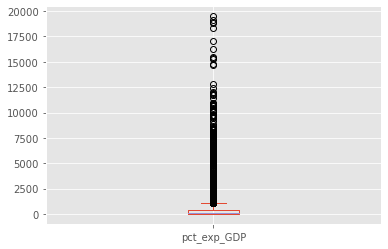

In [26]:
df_le.pct_exp_GDP.plot(kind='box')

In [27]:
len(df_le[df_le.pct_exp_GDP>100])

1303

Elevado nº registros que no se corresponde con  definición (porcentaje).

**'pct_exp_GDP' candidato a ELIMINAR o ASIGNAR NULOS para posterior tratamiento, según umbral de erróneos que establezcamos**

## MEASLES: valores no acordes con definición (por mil habit)

In [28]:
df_le.Measles.describe()

count      2938.000000
mean       2419.592240
std       11467.272489
min           0.000000
25%           0.000000
50%          17.000000
75%         360.250000
max      212183.000000
Name: Measles, dtype: float64

<AxesSubplot:>

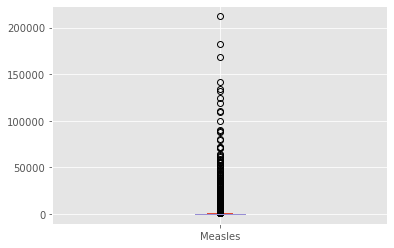

In [29]:
df_le.Measles.plot(kind='box')

In [30]:
len(df_le[df_le.Measles>1000])

525

Elevado nº registros que no se corresponde con  definición (unidades, por mil habitantes).

**'Measles' candidato a ELIMINAR o ASIGNAR NULOS para posterior tratamiento, según umbral de erróneos que establezcamos**

In [31]:
df_le.describe()

,Population,Income_index,pct_exp_GDP,pct_total_exp,GDP,Hepatitis_B,Polio,Diphtheria,Measles,HIV_AIDS,BMI,Alcohol,thinness_5_9_years,thinness__1_19_years,Schooling,under_five_deaths,infant_deaths,Adult_Mortality,Life_expectancy
count,2.286000e+03,2771.000000,2938.000000,2712.00000,2490.000000,2385.000000,2919.000000,2919.000000,2938.000000,2938.000000,2904.000000,2744.000000,2904.000000,2904.000000,2775.000000,2938.000000,2938.000000,2928.000000,2928.000000
mean,1.275338e+07,0.627551,738.251295,5.93819,7483.158469,80.940461,82.550188,82.324084,2419.592240,1.742103,38.321247,4.602861,4.870317,4.839704,11.992793,42.035739,30.303948,164.796448,69.224932
std,6.101210e+07,0.210904,1987.914858,2.49832,14270.169342,25.070016,23.428046,23.716912,11467.272489,5.077785,20.044034,4.052413,4.508882,4.420195,3.358920,160.445548,117.926501,124.292079,9.523867
min,3.400000e+01,0.000000,0.000000,0.37000,1.681350,1.000000,3.000000,2.000000,0.000000,0.100000,1.000000,0.010000,0.100000,0.100000,0.000000,0.000000,0.000000,1.000000,36.300000
25%,1.957932e+05,0.493000,4.685343,4.26000,463.935626,77.000000,78.000000,78.000000,0.000000,0.100000,19.300000,0.877500,1.500000,1.600000,10.100000,0.000000,0.000000,74.000000,63.100000
50%,1.386542e+06,0.677000,64.912906,5.75500,1766.947595,92.000000,93.000000,93.000000,17.000000,0.100000,43.500000,3.755000,3.300000,3.300000,12.300000,4.000000,3.000000,144.000000,72.100000
75%,7.420359e+06,0.779000,441.534144,7.49250,5910.806335,97.000000,97.000000,97.000000,360.250000,0.800000,56.200000,7.702500,7.200000,7.200000,14.300000,28.000000,22.000000,228.000000,75.700000
max,1.293859e+09,0.948000,19479.911610,17.60000,119172.741800,99.000000,99.000000,99.000000,212183.000000,50.600000,87.300000,17.870000,28.600000,27.700000,20.700000,2500.000000,1800.000000,723.000000,89.000000


## BMI

<AxesSubplot:>

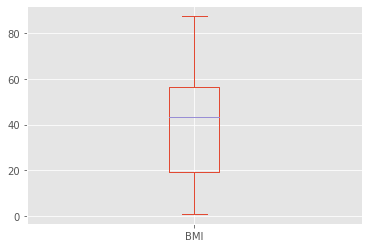

In [32]:
df_le.BMI.plot(kind='box')

**BMI: valores "extraños", parecen muy extremos , en principio conservamos la variable por su importancia**

## 'INFANT_DEATHS' y 'UNDER_FIVE_DEATHS' (per 1000 pop.)

<AxesSubplot:>

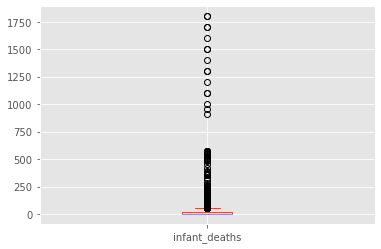

In [33]:
df_le.infant_deaths.plot(kind='box')

In [34]:
len(df_le[df_le.infant_deaths>1000])

13

In [35]:
df_le[df_le.infant_deaths>1000]['infant_deaths'].sort_values(ascending=True)

Country  Year
India    2012    1100
         2011    1100
         2010    1200
         2009    1300
         2008    1300
         2007    1400
         2006    1500
         2005    1500
         2004    1600
         2003    1700
         2002    1700
         2001    1800
         2000    1800
Name: infant_deaths, dtype: int64

In [36]:
df_le[df_le['under_five_deaths']>1000]['under_five_deaths'].sort_values(ascending=True)

Country  Year
India    2015    1100
         2014    1200
         2013    1300
         2012    1400
         2011    1500
         2010    1600
         2009    1700
         2008    1800
         2007    1900
         2006    2000
         2005    2000
         2004    2100
         2003    2200
         2002    2300
         2001    2400
         2000    2500
Name: under_five_deaths, dtype: int64

**Pocos valores, todos de India, los mantenemos, mas tarde decidimos como corregir estos valores erroneos (eliminarregistros afectados / asignar nulos)**

## COLUMNAS RESTANTES

In [37]:
df_le.loc[:,'Schooling':].describe()

,Schooling,under_five_deaths,infant_deaths,Adult_Mortality,Life_expectancy
count,2775.000000,2938.000000,2938.000000,2928.000000,2928.000000
mean,11.992793,42.035739,30.303948,164.796448,69.224932
std,3.358920,160.445548,117.926501,124.292079,9.523867
min,0.000000,0.000000,0.000000,1.000000,36.300000
25%,10.100000,0.000000,0.000000,74.000000,63.100000
50%,12.300000,4.000000,3.000000,144.000000,72.100000
75%,14.300000,28.000000,22.000000,228.000000,75.700000
max,20.700000,2500.000000,1800.000000,723.000000,89.000000


## Por ultimo repasamos la unica categorica

In [38]:
df_le.Status.value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

## 'Population' (múltiples errores, no aprovechable).

In [39]:
df_le.drop(columns=['Population'],inplace=True)

df_le.columns

Index(['Status', 'Income_index', 'pct_exp_GDP', 'pct_total_exp', 'GDP',
       'Hepatitis_B', 'Polio', 'Diphtheria', 'Measles', 'HIV_AIDS', 'BMI',
       'Alcohol', 'thinness_5_9_years', 'thinness__1_19_years', 'Schooling',
       'under_five_deaths', 'infant_deaths', 'Adult_Mortality',
       'Life_expectancy'],
      dtype='object')

## Evaluamos valores incoherentes (no acordes con definición o unidades) resto atributos

In [40]:
from src.custom_preprox.verify_columns_values import verify_num_column_values

col_def_rules = {'pct': ['pct_exp_GDP', 'pct_total_exp', 'Hepatitis_B', 'Polio', 'Diphtheria', 'thinness_5_9_years',
                         'thinness__1_19_years'],
                 'x1000': ['Adult_Mortality', 'infant_deaths', 'Measles', 'under_five_deaths', 'HIV_AIDS'],
                 '0_1': ['Income_index']}

In [41]:
# primero mostrar resultados
verify_num_column_values(dataframe=df_le, dict_col_rules=col_def_rules, show_results=True, max_wrong=0.20)


Valores erróneos (no coherentes con unidades o definición) por columna, umbral erróneos 588.0
                        #n          %
pct_exp_GDP           1303  44.349898
pct_total_exp            0   0.000000
Hepatitis_B              0   0.000000
Polio                    0   0.000000
Diphtheria               0   0.000000
thinness_5_9_years       0   0.000000
thinness__1_19_years     0   0.000000
Adult_Mortality          0   0.000000
infant_deaths           13   0.442478
Measles                525  17.869299
under_five_deaths       16   0.544588
HIV_AIDS                 0   0.000000
Income_index             0   0.000000


**Con umbral de erroneos del 20%, eliminaríamos 'pct_exp_GDP' y podríamos asignar como nulos dichos erróneos en 'Measles', 'infant_deaths' y 'under_five_deaths' para posterior tratamiento.**

Para los 2 últimos más claro, 'Measles' se acerca al umbral, habria que evaluar resultados de mantenerla. Procedemos a realizar los cambios:


In [42]:
df_le = verify_num_column_values(dataframe=df_le, dict_col_rules=col_def_rules, show_results=False, max_wrong=0.20, del_wrong_thresh_col=True, assign_na=True)

df_le.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2938 entries, ('Afghanistan', 2015) to ('Zimbabwe', 2000)
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Status                2938 non-null   object 
 1   Income_index          2771 non-null   float64
 2   pct_total_exp         2712 non-null   float64
 3   GDP                   2490 non-null   float64
 4   Hepatitis_B           2385 non-null   float64
 5   Polio                 2919 non-null   float64
 6   Diphtheria            2919 non-null   float64
 7   Measles               2413 non-null   float64
 8   HIV_AIDS              2938 non-null   float64
 9   BMI                   2904 non-null   float64
 10  Alcohol               2744 non-null   float64
 11  thinness_5_9_years    2904 non-null   float64
 12  thinness__1_19_years  2904 non-null   float64
 13  Schooling             2775 non-null   float64
 14  under_five_deaths     2922 non-null   

In [43]:
df_le.describe()

,Income_index,pct_total_exp,GDP,Hepatitis_B,Polio,Diphtheria,Measles,HIV_AIDS,BMI,Alcohol,thinness_5_9_years,thinness__1_19_years,Schooling,under_five_deaths,infant_deaths,Adult_Mortality,Life_expectancy
count,2771.000000,2712.00000,2490.000000,2385.000000,2919.000000,2919.000000,2413.000000,2938.000000,2904.000000,2744.000000,2904.000000,2904.000000,2775.000000,2922.000000,2925.000000,2928.000000,2928.000000
mean,0.627551,5.93819,7483.158469,80.940461,82.550188,82.324084,88.976378,1.742103,38.321247,4.602861,4.870317,4.839704,11.992793,32.341205,23.942906,164.796448,69.224932
std,0.210904,2.49832,14270.169342,25.070016,23.428046,23.716912,186.937609,5.077785,20.044034,4.052413,4.508882,4.420195,3.358920,87.456561,67.557336,124.292079,9.523867
min,0.000000,0.37000,1.681350,1.000000,3.000000,2.000000,0.000000,0.100000,1.000000,0.010000,0.100000,0.100000,0.000000,0.000000,0.000000,1.000000,36.300000
25%,0.493000,4.26000,463.935626,77.000000,78.000000,78.000000,0.000000,0.100000,19.300000,0.877500,1.500000,1.600000,10.100000,0.000000,0.000000,74.000000,63.100000
50%,0.677000,5.75500,1766.947595,92.000000,93.000000,93.000000,4.000000,0.100000,43.500000,3.755000,3.300000,3.300000,12.300000,4.000000,3.000000,144.000000,72.100000
75%,0.779000,7.49250,5910.806335,97.000000,97.000000,97.000000,66.000000,0.800000,56.200000,7.702500,7.200000,7.200000,14.300000,26.000000,21.000000,228.000000,75.700000
max,0.948000,17.60000,119172.741800,99.000000,99.000000,99.000000,999.000000,50.600000,87.300000,17.870000,28.600000,27.700000,20.700000,943.000000,1000.000000,723.000000,89.000000


In [44]:
df_le[df_le.infant_deaths>900][['infant_deaths', 'under_five_deaths']]

infant_deaths  under_five_deaths
Country Year                                  
India   2015          910.0                NaN
        2014          957.0                NaN
        2013         1000.0                NaN

In [45]:
df_le[df_le.under_five_deaths>900][['infant_deaths', 'under_five_deaths']]

infant_deaths  under_five_deaths
Country Year                                  
Nigeria 2004          563.0              907.0
        2003          567.0              918.0
        2002          571.0              928.0
        2001          574.0              936.0
        2000          576.0              943.0

**Valores muy altos de muerte por 1000 hab en INDIA, por ahora los mantenemos.**

## CORRECCION TIPOS DE LAS COLUMNAS Y AGRUPACIÓN POR LAS MISMAS

### Asignamos tipo correcto a la única categórica:

In [46]:
df_le.Status = df_le.Status.astype('category')

df_le.dtypes

Status                  category
Income_index             float64
pct_total_exp            float64
GDP                      float64
Hepatitis_B              float64
Polio                    float64
Diphtheria               float64
Measles                  float64
HIV_AIDS                 float64
BMI                      float64
Alcohol                  float64
thinness_5_9_years       float64
thinness__1_19_years     float64
Schooling                float64
under_five_deaths        float64
infant_deaths            float64
Adult_Mortality          float64
Life_expectancy          float64
dtype: object

### Agrupamos columnas por tipo para mejor proceso

In [47]:
target = 'Life_expectancy'

num_features = df_le.select_dtypes(exclude='category').columns.to_list()
num_features.remove(target)

num_features

['Income_index',
 'pct_total_exp',
 'GDP',
 'Hepatitis_B',
 'Polio',
 'Diphtheria',
 'Measles',
 'HIV_AIDS',
 'BMI',
 'Alcohol',
 'thinness_5_9_years',
 'thinness__1_19_years',
 'Schooling',
 'under_five_deaths',
 'infant_deaths',
 'Adult_Mortality']

In [48]:
cat_features = df_le.select_dtypes(include='category').columns.to_list()

cat_features

['Status']

## DUPLICADOS

In [49]:
df_le.duplicated().value_counts()

False    2938
dtype: int64

**No existen duplicados**

## VARIANZA CERCANA A CERO

### Numéricas

In [50]:
df_le[num_features].nunique().sort_values(ascending=False)

GDP                     2490
Alcohol                 1076
pct_total_exp            818
Income_index             625
BMI                      608
Measles                  442
Adult_Mortality          425
under_five_deaths        237
thinness_5_9_years       207
infant_deaths            201
HIV_AIDS                 200
thinness__1_19_years     200
Schooling                173
Hepatitis_B               87
Diphtheria                81
Polio                     73
dtype: int64

In [51]:
df_le[num_features].var().sort_values(ascending=False)

GDP                     2.036377e+08
Measles                 3.494567e+04
Adult_Mortality         1.544852e+04
under_five_deaths       7.648650e+03
infant_deaths           4.563994e+03
Hepatitis_B             6.285057e+02
Diphtheria              5.624919e+02
Polio                   5.488733e+02
BMI                     4.017633e+02
HIV_AIDS                2.578390e+01
thinness_5_9_years      2.033002e+01
thinness__1_19_years    1.953812e+01
Alcohol                 1.642205e+01
Schooling               1.128234e+01
pct_total_exp           6.241601e+00
Income_index            4.448031e-02
dtype: float64

**Ninguna de las numéricas tiene varianza cercana a cero** excepto 'Income_index' que se explica por su naturaleza (indice entre 0 y 1)

**DADO EL CASO, PODEMOS AUTOMATIZAR estableciendo un threshold:**

In [52]:
from sklearn.feature_selection import VarianceThreshold

df_le.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2938 entries, ('Afghanistan', 2015) to ('Zimbabwe', 2000)
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Status                2938 non-null   category
 1   Income_index          2771 non-null   float64 
 2   pct_total_exp         2712 non-null   float64 
 3   GDP                   2490 non-null   float64 
 4   Hepatitis_B           2385 non-null   float64 
 5   Polio                 2919 non-null   float64 
 6   Diphtheria            2919 non-null   float64 
 7   Measles               2413 non-null   float64 
 8   HIV_AIDS              2938 non-null   float64 
 9   BMI                   2904 non-null   float64 
 10  Alcohol               2744 non-null   float64 
 11  thinness_5_9_years    2904 non-null   float64 
 12  thinness__1_19_years  2904 non-null   float64 
 13  Schooling             2775 non-null   float64 
 14  under_five_deaths     

In [53]:
colrep = np.ones(shape=4)
dfprueba = pd.DataFrame({'A': np.random.normal(loc=50, scale=10, size=4), 'B': colrep, 'C': np.random.uniform(0,90,size=4)})
dfprueba

,A,B,C
0,51.811952,1.0,64.772783
1,68.209398,1.0,76.595490
2,52.321147,1.0,86.058371
3,36.989200,1.0,22.182975


In [54]:
df_zero = dfprueba.copy()

df_zero_num = df_zero.select_dtypes(include=['number'])
cols = set(df_zero_num.columns)

vt = VarianceThreshold(threshold=0.003)
_ = vt.fit(df_zero_num)

mask = vt.get_support()

elim = list(cols - set(df_zero_num.columns[mask]))

df_zero.drop(columns=elim, inplace=True)
df_zero

,A,C
0,51.811952,64.772783
1,68.209398,76.595490
2,52.321147,86.058371
3,36.989200,22.182975


In [55]:
df_zero_num.columns[mask]

Index(['A', 'C'], dtype='object')

### Categóricas

Revisamos valores y frecuencia de las categóricas:

In [56]:
for col in cat_features:
    print(col.upper(),'\n')
    print(df_le[col].value_counts(),'\n'*2)
    

STATUS 

Developing    2426
Developed      512
Name: Status, dtype: int64 




**No se observan categorías con pocos valores (aunque sí desbalanceo), además el nº de categorías es reducido.**

## MOSTRAR NUMERO DE VALORES PERDIDOS.

In [57]:
len(df_le)

2938

In [58]:
df_le.isnull().sum().sort_values(ascending=False)


Hepatitis_B             553
Measles                 525
GDP                     448
pct_total_exp           226
Alcohol                 194
Income_index            167
Schooling               163
BMI                      34
thinness_5_9_years       34
thinness__1_19_years     34
Polio                    19
Diphtheria               19
under_five_deaths        16
infant_deaths            13
Adult_Mortality          10
Life_expectancy          10
HIV_AIDS                  0
Status                    0
dtype: int64

In [59]:
df_le.isnull().mean().sort_values(ascending=False)*100

Hepatitis_B             18.822328
Measles                 17.869299
GDP                     15.248468
pct_total_exp            7.692308
Alcohol                  6.603131
Income_index             5.684139
Schooling                5.547992
BMI                      1.157250
thinness_5_9_years       1.157250
thinness__1_19_years     1.157250
Polio                    0.646698
Diphtheria               0.646698
under_five_deaths        0.544588
infant_deaths            0.442478
Adult_Mortality          0.340368
Life_expectancy          0.340368
HIV_AIDS                 0.000000
Status                   0.000000
dtype: float64

**Se tratarán más adelante**

# EDA

## UNIDIMENSIONAL NUMÉRICAS

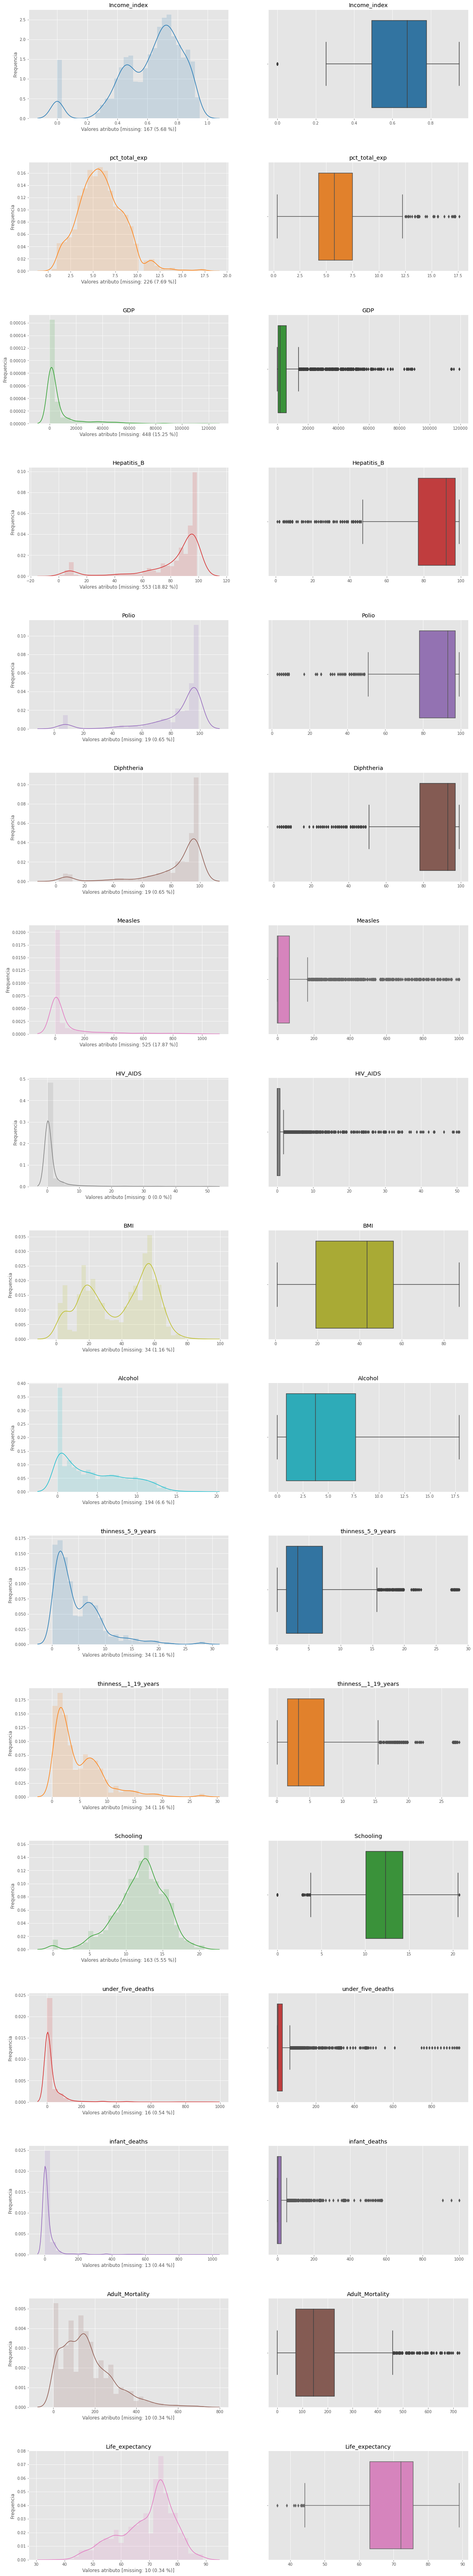

In [60]:
from cust_eda_plot import plot_unidim_num

plot_unidim_num(df_le,num_features+[target],os.path.join(OUTPUT_FOLDER,'unidmensional_numericas_le'))

### RESUMEN UNIDIMENSIONAL NUMÉRICAS.

- 'Income index': ligero sesgo o cola a la izquierda, probablemente debido a los outliers en 0.0 ¿¿posibles missings??
- 'pct_total_exp' y 'GDP': nº considerable outliers extremo superior. GDP sesgo o cola derecha y 15% nulos
- 'Hepatititis_B', 'Polio' y 'Diphtheria' (% inmuniz 1 año): sesgo a la izquierda con nº considerable de outliers en ese extremo. Hepatitis 18% nulos.
- 'Measles' y 'HIV/AIDS' (muertos por 1000 nacim hasta 4 años): sesgo a la derecha con gran nº de outliers
- BMI: valores demasiado altos, consulta en internet los dio como posibles. Ligero sesgo negativo
- Alcohol (consumo litros +15 años): sesgo a la derecha
- 2 variables 'thinness' (% pobl. en esa franja edad)): sesgo positivo con considerable nº de outliers.
- under-five_deaths, infant deaths, adult_mortality (nº por 1000 hab.): sesgo a la derecha, considerable nº outliers

- TARGET Life_expectance (edad): ligero sesgo a la izquierda.

**VARIABLES CON SESGO (outliers):**

pct_total_exp, GDP, Hepatitis_B, Polio, Diphtheria, HIV_AIDS, ambas 'Thinness', under-five_deaths, infant deaths, adult_mortality.
También en menor medida (pocos ouliers) Income_index y Schooling.


**VARIABLES CON SESGO (sin outliers):**

Alcohol, BMI (muy leve)

**Un numero elevado de las variables presenta sesgo claro. Una opción es realizar transformación sobre ellas (logarítmica, raíz cuadrada...) con "Power Transformer (scikit).**
**Como segunda opción podría también examinarse distribución despues de eliminar outliers".
Valorar transformación también para las dos restantes sin outliers**

**Por último teniendo en cuenta que el sesgo muy leve, valorar transformación para el target**





## UNIDIMENSIONAL CATEGÓRICAS

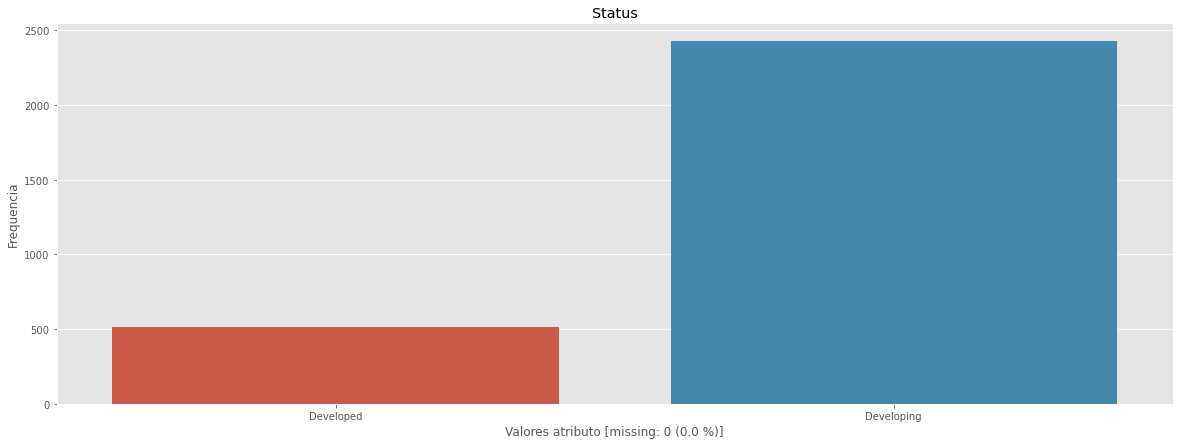

In [61]:
from cust_eda_plot import plot_unidim_cat

plot_unidim_cat(df_le,cat_features,os.path.join(OUTPUT_FOLDER,'unidim_cat_le'))

**La diferencia de frecuencias podría ser un problema en la partición train-test o si usamos CV**



## BIDIMENSIONAL, VARIABLES NUMÉRICAS.

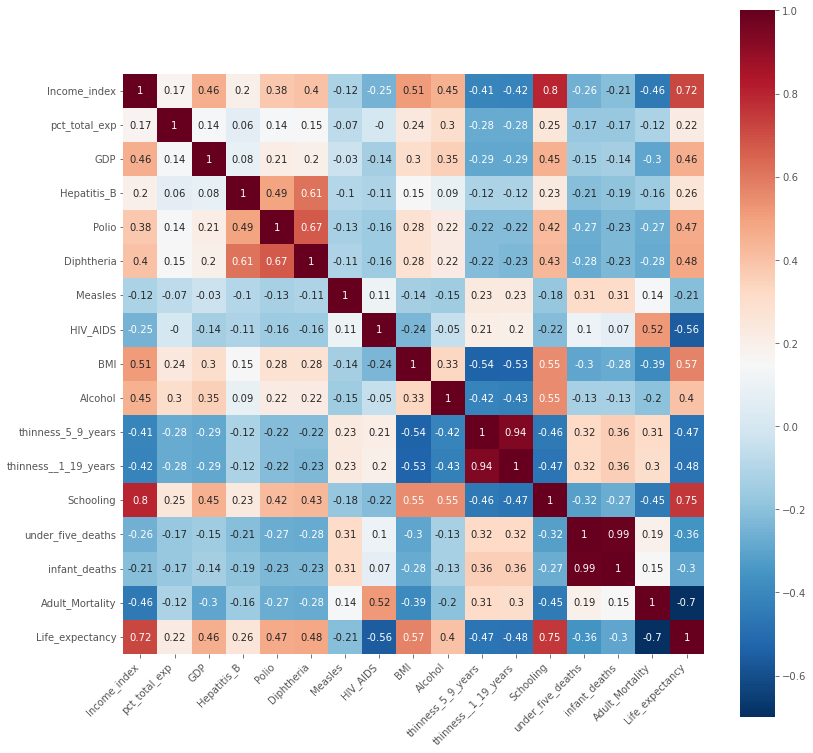

In [62]:
from cust_eda_plot import plot_matrx_corr

plot_matrx_corr(df_le,num_features+[target],os.path.join(OUTPUT_FOLDER,'matrx_corr_le'))

### - CORRELACIÓN ENTRE ATRIBUTOS.

- 'Income_index' con 'Schooling': 0.8  -->  Muy alta. Entre las dos parece de más interés conservar los ingresos.
- 'Polio' y 'Diphtheria': 0.67   -->  Algo elevada, pero las dos son de interés
- Variables 'thinness': 0.94   -->  De esperar, nos podríamos quedar con la de entre 1 y 19 años, más general
- 'under-five_deaths' e 'infant_deaths': 1   -->  nos podríamos quedar con la última
- Valores negativos de correlación solo alcanzan el máximo de -0.54 y -0.53 entre BMI y las 2 'thinness'

### - CORRELACIÓN CON TARGET

Las variables con mayor correlación son por orden:

- 'Schooling' e 'Income_index' con 0.75 y 0.72 respectivamente (replantearse escoger 'Schooling'??)
- 'Adult_mortality' con -0.7
- 'HIV/AIDS' con -0.56
- ambas 'thinness' con prácticamente el mismo valor, una centésima más alta (-0.48) entre 1 y 19 años
- 'Polio' y 'Diphteria' con 0.47 y 0.48 
- 'GDP' con 0.46

Casos "extraños":
- 'BMI' con 0.57 --> correlación positiva y ligeramente alta???  De nuevo sospechas de los valores 


Veamos los diagramas de puntos para las mencionadas:

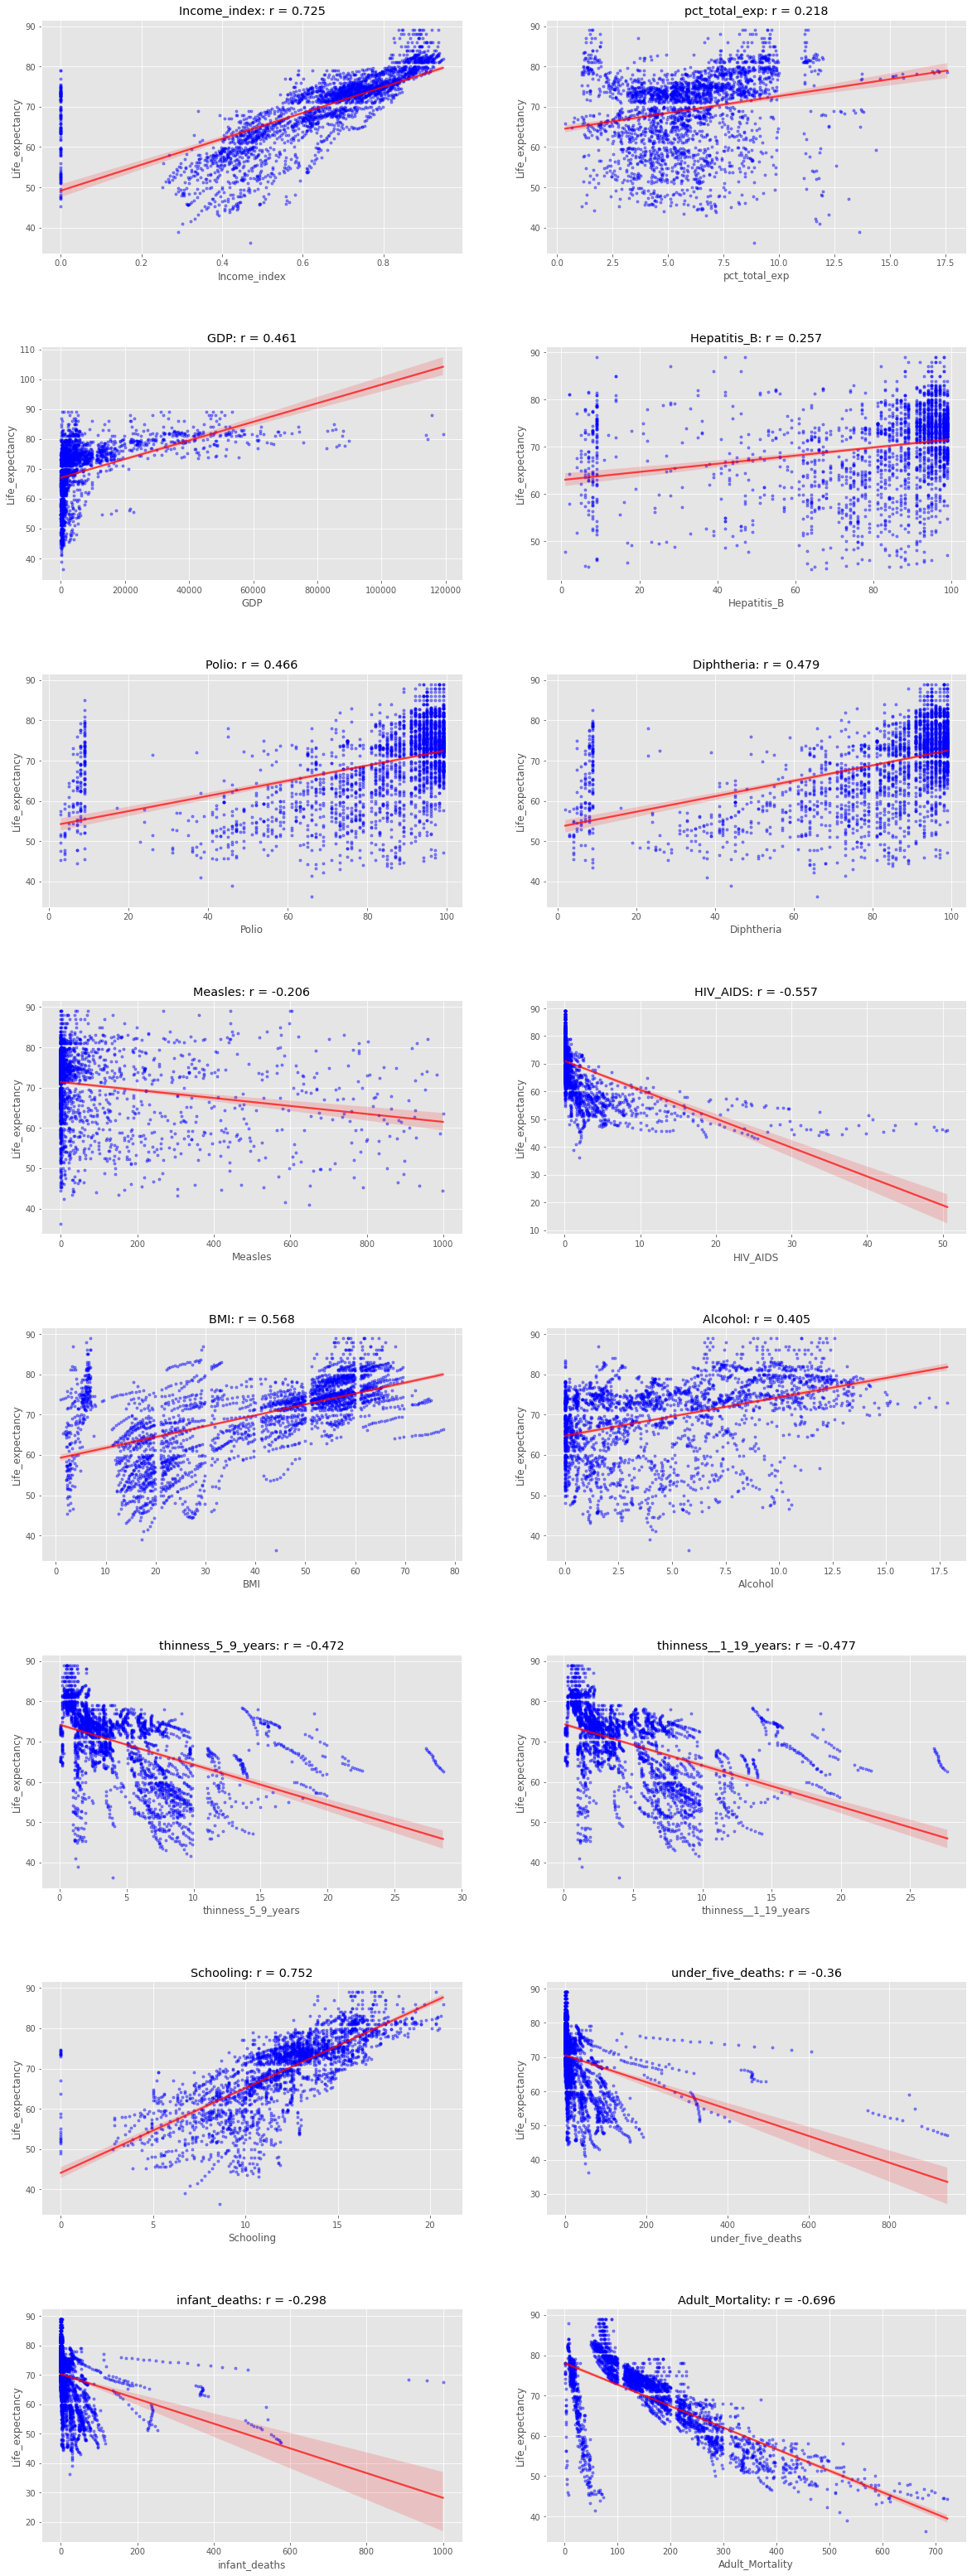

In [63]:
from cust_eda_plot import plot_scttreg_target

plot_scttreg_target(df_le,num_features,target,os.path.join(OUTPUT_FOLDER,'scatter_reg_le'))


**Observamos en las comentadas anteriormente con mayor correlación:**

- En 'Income_index' los puntos con valor 0.0 (posibles missings): tratarlos haría previsiblemente aumentar la correlación

- 'Adult_mortality': outliers (a partir de 475 aprox.) pueden afectar en grado considerable

- 'HIV/AIDS': outliers (a partir de 2 aprox.) previsiblemente afectaran en grado considerable

- 'thinness__1-19_years': outliers (a partir de 15 aprox.) pueden afectar en grado considerable

- 'Polio' y 'Diphteria': de principio se observan muy similares, como ya indicaba su correlación. Para ambas los outliers (por debajo de 50 aprox.) previsiblemente afectaran en grado considerable

- 'GDP': outliers (a partir de 18000 aprox.) pueden afectar en grado considerable



Exceptuando la primera 'Income_index', dados los claros sesgos de las demás si las aplicáramos 'Power transform' en el preprocesado es probsble mejorar los valores de correlación

## BIDIMENSIONAL, VARIABLES CATEGÓRICAS

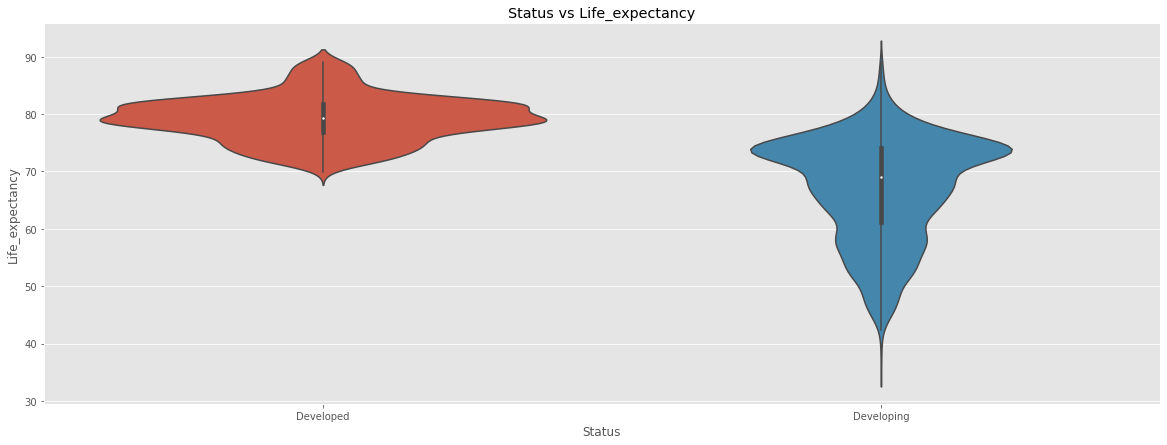

In [64]:
from cust_eda_plot import plot_categ_target

plot_categ_target(df_le,cat_features,target,os.path.join(OUTPUT_FOLDER,'categ_target_le'))

**Como vemos y era de esperar hay una clara diferencia en la distribución de la esperanza de vida para países desarrollados y en vías de desarrollo**

## DISTRIBUCIÓN VALORES PERDIDOS (MISSING)

In [65]:
import missingno as msno


<AxesSubplot:>

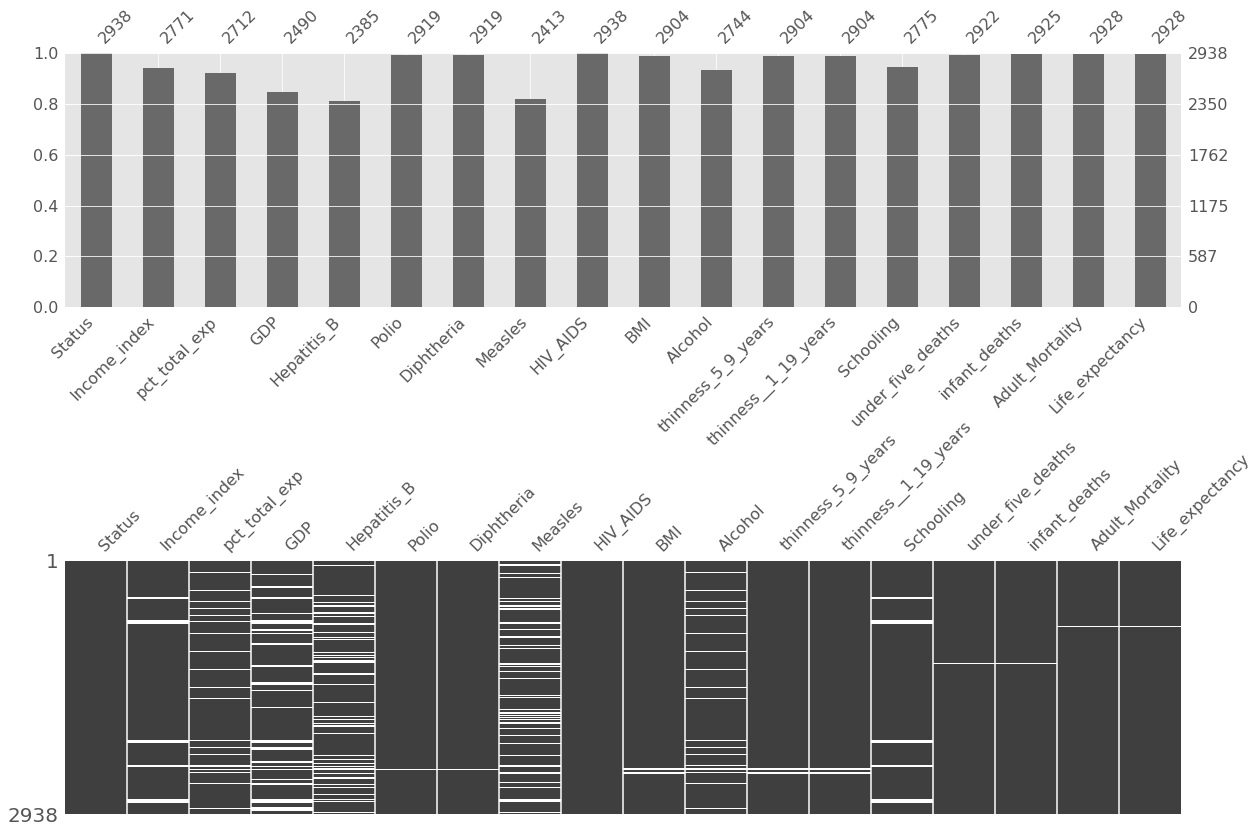

In [66]:
fig, axes = plt.subplots(2, 1, figsize=(20, 14), gridspec_kw={'hspace': 1})
ax = axes.ravel()

msno.bar(df_le, ax=ax[0])
msno.matrix(df_le, ax=ax[1])



**AQUI NO SE DA EL CASO, PERO PARA ELIMINAR COLUMNAS CON Nº ELEVADO DE NULOS:**

threshold=0.7
dataset = dataset[dataset.columns[dataset.isnull().mean() < threshold]]
print(dataset)

### Comprobamos nº de missings por filas

In [67]:
# trabajamos con copia dataframe
dfc = df_le.copy()

dfc['row_nulls'] = df_le.isnull().sum(axis=1)

dfc.groupby(['row_nulls'])['row_nulls'].agg([('## rows','count')])

,## rows
row_nulls,
0,1555
1,834
2,274
3,146
4,60
5,43
6,12
7,2
8,4


**Filas con elevado nº de nulos, establecido umbral (6) a partir de la tabla anterior**

In [68]:
print(len(dfc[dfc.row_nulls>=6]))

# registros con ese nº elevado
dfc[dfc.row_nulls>=6].index

# probado anteriormente, con 5 nos quedaríamos prácticamnete sin datos de UK y Korea

26


MultiIndex([('Democratic Republic of the Congo', 2015),
            (                          'Monaco', 2013),
            (                      'San Marino', 2013),
            (                         'Somalia', 2012),
            (                         'Somalia', 2011),
            (                         'Somalia', 2008),
            (                         'Somalia', 2007),
            (                         'Somalia', 2004),
            (                         'Somalia', 2003),
            (                         'Somalia', 2002),
            (                         'Somalia', 2001),
            (                         'Somalia', 2000),
            (                     'South Sudan', 2012),
            (                     'South Sudan', 2011),
            (                     'South Sudan', 2010),
            (                     'South Sudan', 2009),
            (                     'South Sudan', 2008),
            (                     'South Sudan',

**Visto el nº y los registros afectados (bastantes menos países, muy probables con problemas a la hora de recoger datos), damos por bueno el umbral de 6 (desechar filas/registros con 5 o más nulos)**

### Correlación missings

<AxesSubplot:>

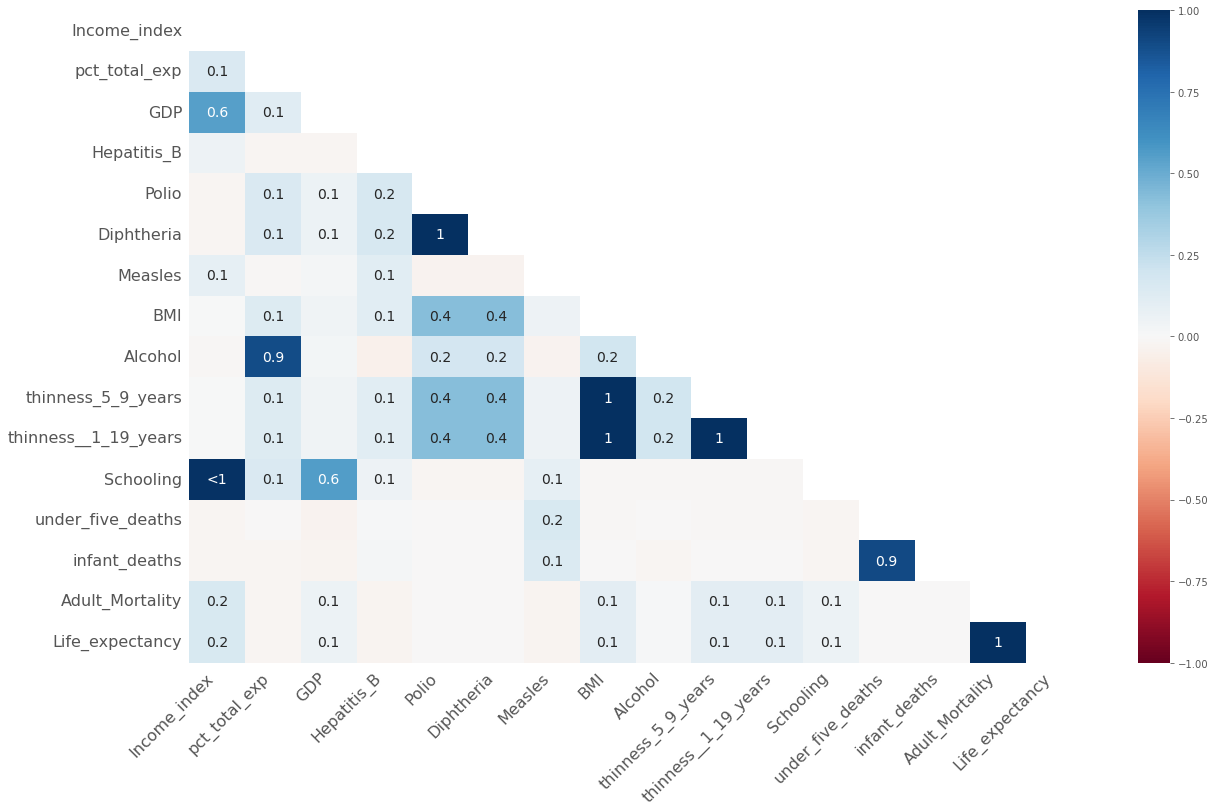

In [69]:
msno.heatmap(df_le)

### Nulos en el target

In [70]:
dfc[dfc.Life_expectancy.isnull()].index

MultiIndex([(         'Cook Islands', 2013),
            (             'Dominica', 2013),
            (     'Marshall Islands', 2013),
            (               'Monaco', 2013),
            (                'Nauru', 2013),
            (                 'Niue', 2013),
            (                'Palau', 2013),
            ('Saint Kitts and Nevis', 2013),
            (           'San Marino', 2013),
            (               'Tuvalu', 2013)],
           names=['Country', 'Year'])

**Eliminaremos estos registros**

## CASO 'Income_index', valores 0.0

Valor dentro del rango (0 - 1), pero puede ser que se correspondan con "no disponibles" (missing)

In [71]:
set(dfc[dfc.Income_index==0].index.get_level_values('Country'))

{'Antigua and Barbuda',
 'Bahamas',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Burkina Faso',
 'Cabo Verde',
 'Chad',
 'Comoros',
 'Equatorial Guinea',
 'Eritrea',
 'Ethiopia',
 'Georgia',
 'Grenada',
 'Guinea-Bissau',
 'Kiribati',
 'Lebanon',
 'Madagascar',
 'Micronesia (Federated States of)',
 'Montenegro',
 'Nigeria',
 'Oman',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Seychelles',
 'South Sudan',
 'Suriname',
 'The former Yugoslav republic of Macedonia',
 'Timor-Leste',
 'Turkmenistan',
 'Uzbekistan',
 'Vanuatu'}

In [72]:
len(dfc[dfc.Income_index==0])

130

**Por el nº relativamente elevado de registros afectados y como podemos ver por los países que muy probablemente se daba a falta de datos. Dada también la relevancia de la variable y su correlación alta con el target decidimos en vez de eliminarlos asignarlos como nulos.**

## RESUMEN.

De partida:

- Número no elevado de observaciones (filas) con 6 o + missings. A partir de 5 perderíamos demasiados países
- tenemos 10 missings en el target 

En cuanto a estos casos podríamos eliminar los registros (filas) afectados.


**Income index, valores 0.0:** Variable altamente correlacionada con target, parece por lo países que pueden ser datos no disponibles (missings). Cambiar valores a nulos y tratarlos en su apartado.


## ¿Alguna relación con 'Status'?

<AxesSubplot:>

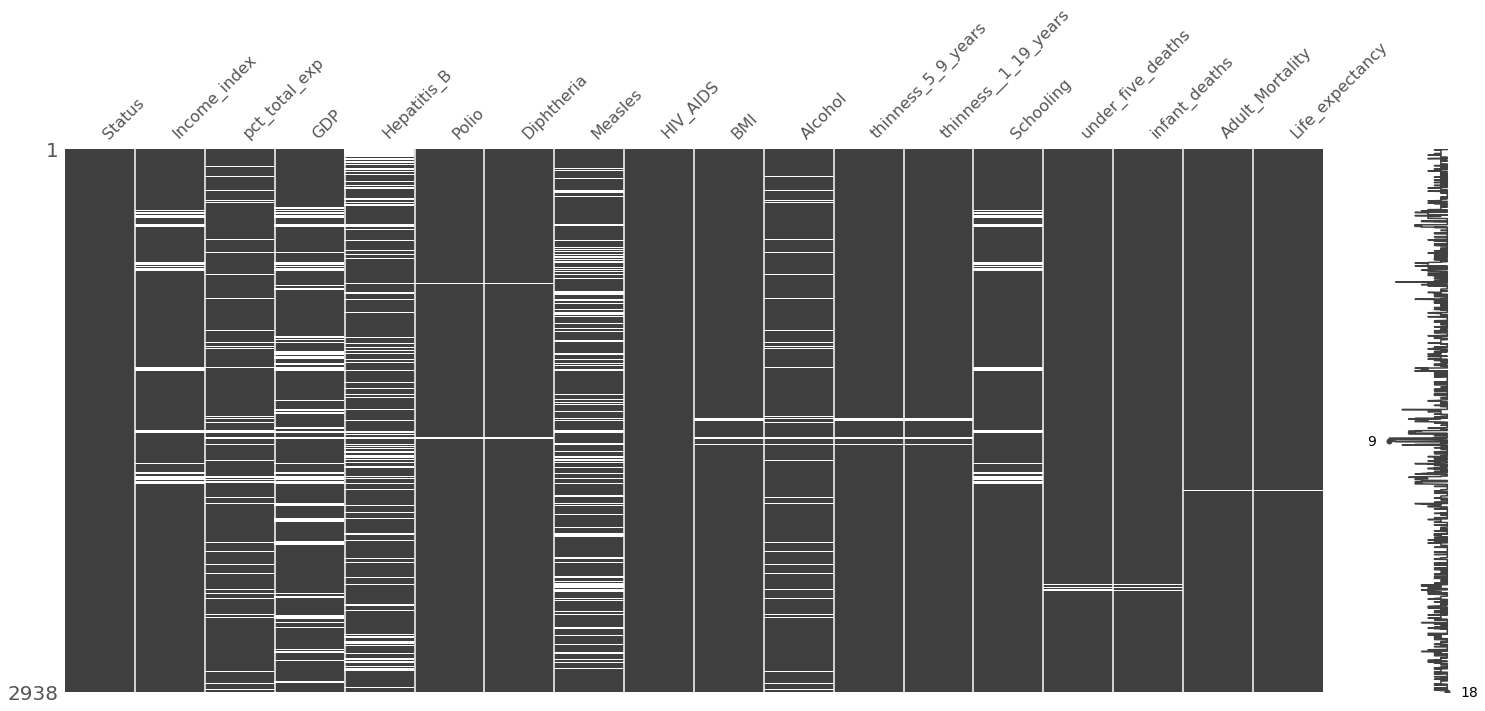

In [73]:
msno.matrix(df_le.sort_values('Status'))

In [74]:
df_le.sort_values('Status').head()

Status  Income_index  pct_total_exp          GDP  \
Country     Year                                                        
Switzerland 2000  Developed         0.879           9.91  37813.23426   
Sweden      2011  Developed         0.901          11.70  59593.28711   
            2012  Developed         0.903          11.80  57134.77700   
            2013  Developed         0.904          11.97   6283.24522   
            2014  Developed         0.906          11.93   5918.19898   

                  Hepatitis_B  Polio  Diphtheria  Measles  HIV_AIDS   BMI  \
Country     Year                                                            
Switzerland 2000          NaN   95.0        93.0      0.0       0.1   5.8   
Sweden      2011         42.0   98.0        98.0     26.0       0.1  57.7   
            2012         53.0   98.0        98.0     30.0       0.1  58.1   
            2013         67.0   98.0        98.0     51.0       0.1  58.5   
            2014         67.0   98.0        98.0     26.0       0.1  59.0   

                  Alcohol  thinness_5_9_years  thinness__1_19_years  \
Country     Year                                                      
Switzerland 2000    11.26                 0.5                   0.7   
Sweden      2011     7.40                 1.3                   1.4   
            2012     7.40                 1.3                   1.4   
            2013     7.30                 1.3                   1.4   
            2014     7.30                 1.3                   1.5   

                  Schooling  under_five_deaths  infant_deaths  \
Country     Year                                                
Switzerland 2000       15.1                0.0            0.0   
Sweden      2011       16.0                0.0            0.0   
            2012       15.8                0.0            0.0   
            2013       15.8                0.0            0.0   
            2014       15.8                0.0            0.0   

                  Adult_Mortality  Life_expectancy  
Country     Year                                    
Switzerland 2000             78.0             79.7  
Sweden      2011             58.0             81.7  
            2012             57.0             81.7  
            2013             57.0             81.9  
            2014             54.0             82.3

In [75]:
df_le.sort_values('Status').tail()

Status  Income_index  pct_total_exp           GDP  \
Country  Year                                                          
Greece   2006  Developing         0.850           9.34   2481.157810   
         2005  Developing         0.839           9.36  22551.735740   
         2004  Developing         0.830           8.30  21955.149000   
         2002  Developing         0.811           8.72   1411.313390   
Zimbabwe 2000  Developing         0.434           7.10    547.358878   

               Hepatitis_B  Polio  Diphtheria  Measles  HIV_AIDS   BMI  \
Country  Year                                                            
Greece   2006         94.0   98.0        98.0      0.0       0.1  61.2   
         2005         93.0   96.0        96.0    122.0       0.1   6.5   
         2004         92.0   95.0        95.0      1.0       0.1  59.9   
         2002         91.0   92.0        92.0      5.0       0.1  58.6   
Zimbabwe 2000         79.0   78.0        78.0      NaN      43.5  25.5   

               Alcohol  thinness_5_9_years  thinness__1_19_years  Schooling  \
Country  Year                                                                 
Greece   2006     9.42                 0.7                   0.8       16.3   
         2005     9.95                 0.7                   0.8       15.6   
         2004     9.56                 0.8                   0.8       15.3   
         2002     8.09                 0.8                   0.8       14.6   
Zimbabwe 2000     1.68                11.2                  11.0        9.8   

               under_five_deaths  infant_deaths  Adult_Mortality  \
Country  Year                                                      
Greece   2006                1.0            0.0             77.0   
         2005                1.0            0.0             81.0   
         2004                1.0            0.0             81.0   
         2002                1.0            1.0             81.0   
Zimbabwe 2000               39.0           24.0            665.0   

               Life_expectancy  
Country  Year                   
Greece   2006             79.7  
         2005             79.3  
         2004             79.2  
         2002             79.0  
Zimbabwe 2000             46.0

**Valor minoritario 'Developed' (poco más de la quinta parte) van primeros.
Con esta condición no parece verse en la gráfica relación con status de nulos en los otros atributos**

# EDA, primeras acciones

- (correlacion) Eliminar atributos 'Schooling', 'thinness_5-9_years', 'under-five_deaths'
- Eliminar filas con 6 o + missings.
- Eliminar filas con missings en el target.
- marcar como nulos: en 'income_index' valores 0.0; en 'infant_deaths' valores por encima de 1000 (todos los de 'India')


In [76]:
df_le.drop(columns=['Schooling','under_five_deaths','thinness_5_9_years'], inplace=True)

df_le.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2938 entries, ('Afghanistan', 2015) to ('Zimbabwe', 2000)
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Status                2938 non-null   category
 1   Income_index          2771 non-null   float64 
 2   pct_total_exp         2712 non-null   float64 
 3   GDP                   2490 non-null   float64 
 4   Hepatitis_B           2385 non-null   float64 
 5   Polio                 2919 non-null   float64 
 6   Diphtheria            2919 non-null   float64 
 7   Measles               2413 non-null   float64 
 8   HIV_AIDS              2938 non-null   float64 
 9   BMI                   2904 non-null   float64 
 10  Alcohol               2744 non-null   float64 
 11  thinness__1_19_years  2904 non-null   float64 
 12  infant_deaths         2925 non-null   float64 
 13  Adult_Mortality       2928 non-null   float64 
 14  Life_expectancy       

In [77]:
df_le.dropna(thresh=10, inplace=True)

In [78]:
df_le.dropna(axis='index',subset=['Life_expectancy'],inplace=True)

In [79]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2916 entries, ('Afghanistan', 2015) to ('Zimbabwe', 2000)
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Status                2916 non-null   category
 1   Income_index          2756 non-null   float64 
 2   pct_total_exp         2702 non-null   float64 
 3   GDP                   2481 non-null   float64 
 4   Hepatitis_B           2375 non-null   float64 
 5   Polio                 2908 non-null   float64 
 6   Diphtheria            2908 non-null   float64 
 7   Measles               2392 non-null   float64 
 8   HIV_AIDS              2916 non-null   float64 
 9   BMI                   2896 non-null   float64 
 10  Alcohol               2735 non-null   float64 
 11  thinness__1_19_years  2896 non-null   float64 
 12  infant_deaths         2903 non-null   float64 
 13  Adult_Mortality       2916 non-null   float64 
 14  Life_expectancy       

<AxesSubplot:>

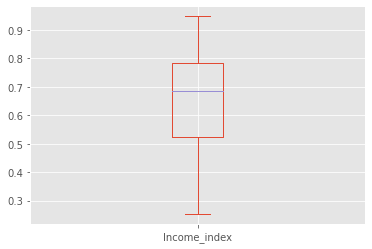

In [80]:
df_le.loc[df_le.Income_index==0,'Income_index'] = np.nan

df_le.Income_index.plot(kind='box')

In [81]:
df_le.Income_index.min()

0.253

<AxesSubplot:ylabel='Density'>

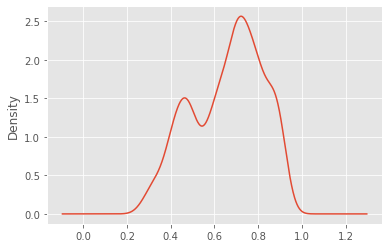

In [82]:
df_le.Income_index.plot(kind='density')

## ESTADO DESPUES DE LAS PRIMERAS ACCIONES (NULOS)

<AxesSubplot:>

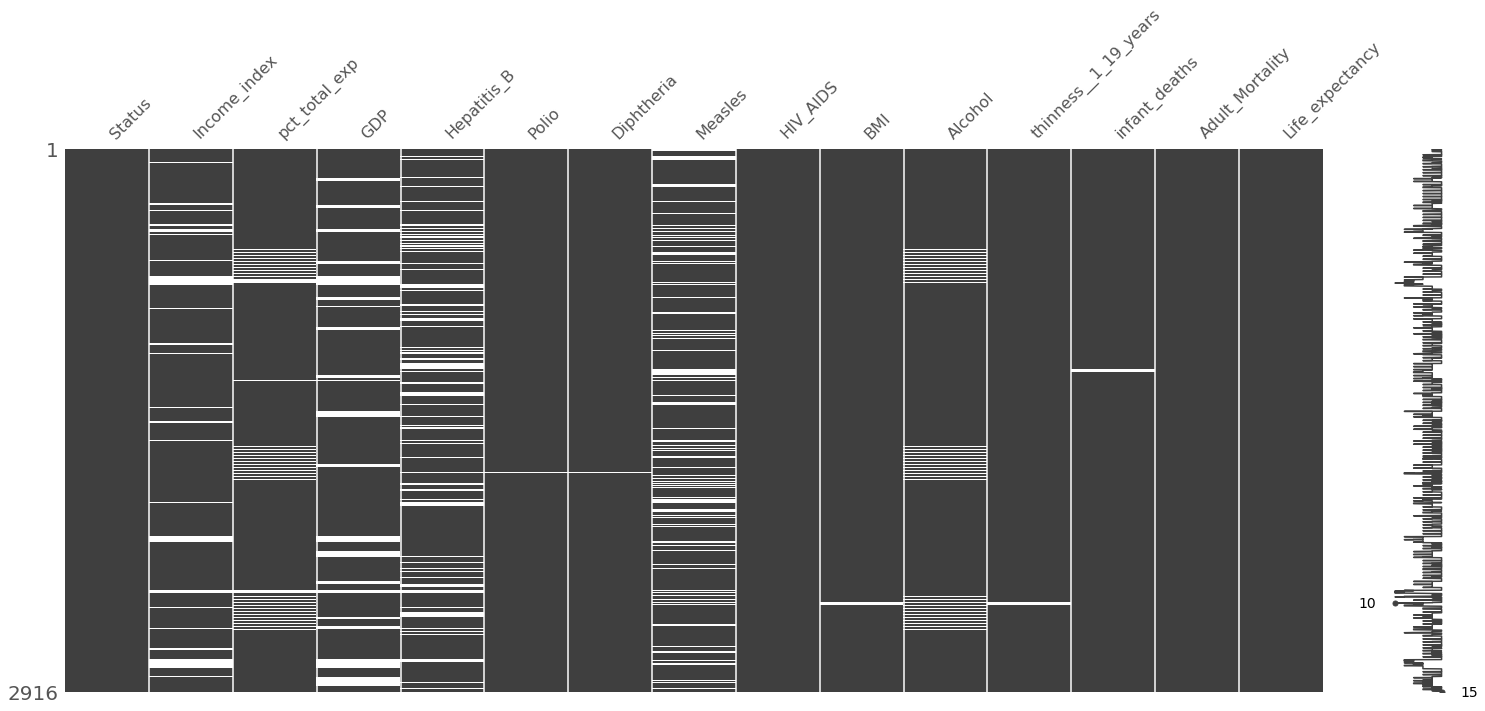

In [83]:
msno.matrix(df_le)

## RELACIÓN NULOS CON EL TARGET

In [84]:
(df_le.isnull().mean().sort_values(ascending=False))*100

Hepatitis_B             18.552812
Measles                 17.969822
GDP                     14.917695
Income_index             9.567901
pct_total_exp            7.338820
Alcohol                  6.207133
BMI                      0.685871
thinness__1_19_years     0.685871
infant_deaths            0.445816
Polio                    0.274348
Diphtheria               0.274348
Status                   0.000000
HIV_AIDS                 0.000000
Adult_Mortality          0.000000
Life_expectancy          0.000000
dtype: float64

In [85]:
# tomamos 5% missings como tshd
threshold_na = int(len(df_le)*5/100)
features_na=[features for features in df_le.columns if df_le[features].isnull().sum()>threshold_na]

features_na

['Income_index', 'pct_total_exp', 'GDP', 'Hepatitis_B', 'Measles', 'Alcohol']

**Vamos a distinguir si la distribución de nulos en los atributos afecta al target (influiría pues el tratamiento de nulos, posibles opciones)**

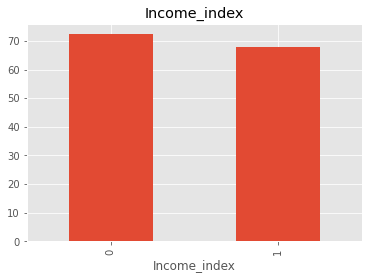

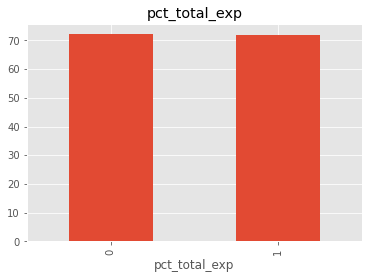

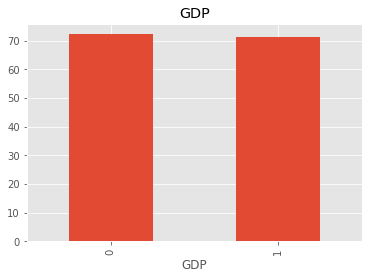

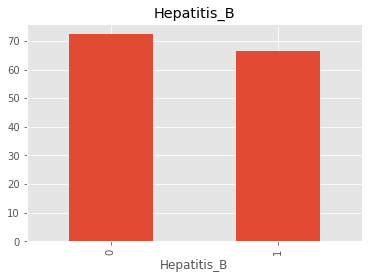

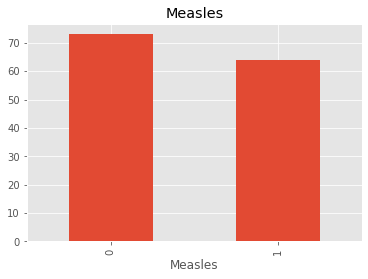

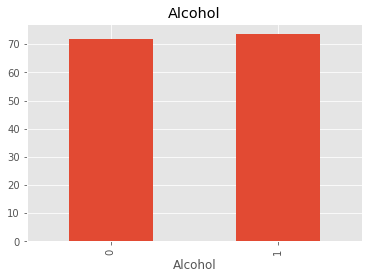

In [86]:
dfc = df_le.copy()

for feature in features_na:
       
    # asignamos al atributo variable boleana: 1 si es nulo, 0 contrario
    dfc[feature] = np.where(dfc[feature].isnull(), 1, 0)
    
    # agrupamos en cada atributo por presencia de nulos, agragando la mediana del TARGET en cada grupo
    dfc.groupby(feature)[target].median().plot.bar()
    plt.title(feature)
    plt.show()

**No se aprecian grandes diferencias en el target en función de los nulos en cada una de las variables**

## RESUMEN ACCIONES REALIZADAS.

- (No duplicados ni atributos con varianza cercana a cero)
- (incoherencias, valores erróneos en nº elevado) Eliminar columnas 'Population' (directamente, nº muy elevado), 'pct_exp_GDP' (superado el umbral del 20%)
- (correlacion entre atributos) Eliminar atributos 'Schooling', 'thinness_5-9_years', 'under-five_deaths'
- (nulos) Eliminar filas con 6 o + missings. Eliminar filas con missings en el target.
- (nulos) marcar como nulos: en 'income_index' valores 0.0; en 'infant_deaths' valores por encima de 1000

 


In [87]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2916 entries, ('Afghanistan', 2015) to ('Zimbabwe', 2000)
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Status                2916 non-null   category
 1   Income_index          2637 non-null   float64 
 2   pct_total_exp         2702 non-null   float64 
 3   GDP                   2481 non-null   float64 
 4   Hepatitis_B           2375 non-null   float64 
 5   Polio                 2908 non-null   float64 
 6   Diphtheria            2908 non-null   float64 
 7   Measles               2392 non-null   float64 
 8   HIV_AIDS              2916 non-null   float64 
 9   BMI                   2896 non-null   float64 
 10  Alcohol               2735 non-null   float64 
 11  thinness__1_19_years  2896 non-null   float64 
 12  infant_deaths         2903 non-null   float64 
 13  Adult_Mortality       2916 non-null   float64 
 14  Life_expectancy       

In [88]:
df_le.to_csv(os.path.join(DATA_FOLDER,'life_expectance_EDA.csv'))